In [24]:
from reddit import RedditData, RedditSubmissions, SubredditSubmissions  

# Employment

## Submissions

In [3]:
# # start_week = 0
# # end_week = 30
# period = [19, 21, 22, 24, 25] #range(start_week, end_week+1, 1) 

# emp_submissions = RedditSubmissions('Employment')

# for week_num in period:
    
#     try:
#         emp_submissions.get_one_week(week_num)
#         p = "Got week {}".format(week_num)
#         print(p)
#     except:
#         f = "Failed to get week {}".format(week_num)
#         print(f)
#         continue
        
#     emp_submissions.export_one_week()
#     exp = "Successfully exported week {}".format(week_num)
#     print("{}\n{}\n\n".format(exp, '='*len(exp)))

In [2]:
emp_df, emp_logs = RedditData.load_all(
    topic = 'Employment',
    post_type = 'Submissions',
    start_week = 0,
    end_week = 30,
    df_only = False)

In [6]:
emp_logs

,weekNum,weekStart,weekEnd,mostRecent,oldest,periodCovered,total,totalOverall,timeTaken,timeTakenTotal
2020-10-19,0,2020-10-19,2020-10-26,2020-10-25 23:59:39+00:00,2020-10-19 00:00:26+00:00,6 days 23:59:13,12909,12909,290.46,290.46
2020-10-26,1,2020-10-26,2020-11-02,2020-11-01 23:58:33+00:00,2020-10-26 00:00:49+00:00,6 days 23:57:44,13761,26670,283.03,573.49
2020-11-02,2,2020-11-02,2020-11-09,2020-11-08 23:59:25+00:00,2020-11-02 00:00:09+00:00,6 days 23:59:16,9233,35903,208.98,782.47
2020-11-09,3,2020-11-09,2020-11-16,2020-11-15 23:59:01+00:00,2020-11-09 00:02:20+00:00,6 days 23:56:41,13488,49391,1145.11,1927.58
2020-11-16,4,2020-11-16,2020-11-23,2020-11-22 23:59:59+00:00,2020-11-16 00:00:04+00:00,6 days 23:59:55,13800,63191,1112.68,3040.26
2020-11-23,5,2020-11-23,2020-11-30,2020-11-29 23:59:38+00:00,2020-11-23 00:00:41+00:00,6 days 23:58:57,12175,75366,560.18,3600.44
2020-11-30,6,2020-11-30,2020-12-07,2020-12-06 23:58:57+00:00,2020-11-30 00:00:45+00:00,6 days 23:58:12,12854,88220,409.80,4010.24
2020-12-07,7,2020-12-07,2020-12-14,2020-12-13 23:59:30+00:00,2020-12-07 00:00:32+00:00,6 days 23:58:58,13245,101465,434.54,4444.78
2020-12-14,8,2020-12-14,2020-12-21,2020-12-20 23:59:18+00:00,2020-12-14 00:00:04+00:00,6 days 23:59:14,12956,114421,484.86,4929.64
2020-12-21,9,2020-12-21,2020-12-28,2020-12-27 23:58:51+00:00,2020-12-21 00:00:05+00:00,6 days 23:58:46,11128,125549,350.04,5279.68


## Cleaning (stage 1a)

Minimal. Only concerned with removing any anomalies/useless posts missed by filters (e.g. blanks/removed/NaN, etc.)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Logs

The *totalOverall* and *timeTakenTotal* are not particularly useful + because I re-downloaded some of the weeks, they are not accurate in places.
Exporting this to Aggregate folder.

In [132]:
def clean_logs(logs_df):
    
    logs_df.drop(['totalOverall', 'timeTakenTotal'], axis = 1, inplace = True)
    return logs_df

In [5]:
emp_logs_clean = clean_logs(emp_logs)
emp_logs_path = '/Volumes/Survey_Social_Media_Compare/Methods/Data/Reddit/Raw/Aggregate/emp_1_logs.csv'
emp_logs_clean.to_csv(emp_logs_path, index = False, header = True)

In [8]:
emp_logs_clean

,weekNum,weekStart,weekEnd,mostRecent,oldest,periodCovered,total,timeTaken
2020-10-19,0,2020-10-19,2020-10-26,2020-10-25 23:59:39+00:00,2020-10-19 00:00:26+00:00,6 days 23:59:13,12909,290.46
2020-10-26,1,2020-10-26,2020-11-02,2020-11-01 23:58:33+00:00,2020-10-26 00:00:49+00:00,6 days 23:57:44,13761,283.03
2020-11-02,2,2020-11-02,2020-11-09,2020-11-08 23:59:25+00:00,2020-11-02 00:00:09+00:00,6 days 23:59:16,9233,208.98
2020-11-09,3,2020-11-09,2020-11-16,2020-11-15 23:59:01+00:00,2020-11-09 00:02:20+00:00,6 days 23:56:41,13488,1145.11
2020-11-16,4,2020-11-16,2020-11-23,2020-11-22 23:59:59+00:00,2020-11-16 00:00:04+00:00,6 days 23:59:55,13800,1112.68
2020-11-23,5,2020-11-23,2020-11-30,2020-11-29 23:59:38+00:00,2020-11-23 00:00:41+00:00,6 days 23:58:57,12175,560.18
2020-11-30,6,2020-11-30,2020-12-07,2020-12-06 23:58:57+00:00,2020-11-30 00:00:45+00:00,6 days 23:58:12,12854,409.80
2020-12-07,7,2020-12-07,2020-12-14,2020-12-13 23:59:30+00:00,2020-12-07 00:00:32+00:00,6 days 23:58:58,13245,434.54
2020-12-14,8,2020-12-14,2020-12-21,2020-12-20 23:59:18+00:00,2020-12-14 00:00:04+00:00,6 days 23:59:14,12956,484.86
2020-12-21,9,2020-12-21,2020-12-28,2020-12-27 23:58:51+00:00,2020-12-21 00:00:05+00:00,6 days 23:58:46,11128,350.04


#### Raw data (30 weeks)

* We have 3 columns for date ('created', 'created_utc', 'date')
    * We only need one.
    * Remove 'created' and 'created_utc'.
* 393931 observations in total.
* is_blank:
    * Value either NaN or False: all but 474 obs are NaN.
    * Remove
* title:    
    * Most commonly ~50 words
    * Potentially have ~90,000 observations where the title would be too short to be used effectively in NLP.
    * Leaving all but the missing ones for now.
* selftext:
    * 70563 posts have missing values for 'selftext' (submission body).
    * 14128 posts have 'selftext' removed.
        * 5863 of the posts with 'selftext' removed have a 'title' with less than 60 characters - might be difficult to do NLP on this. 
    * However, all of these have a 'title'.
    * This should be enough for NLP in most cases.
    * Where both are present -> combine. 
* is_reddit_media_domain:
    * False    387249
    * True       6682
    * All those with 'True' for this value have missing 'selftext'.
    * However, all have a title.
* is_robot_indexable:
    * True     360464
    * False     33467
    * All False have missing/removed selftext.
    * However, title is still there. 
* num_comments:
    * 130677 (~33%) of submissions have 0 comments
    * 302841 (~76%) of submissions have less than 10 comments.
    * 387794 (~98%) of submissions have less than 100 comments.
* num_crossposts:
    * over 99% of submissions haven no crossposts.
    * remove.

In [142]:
def clean_df_1a(df):
    
    df.drop(['created', 
             'created_utc', 
             'is_blank',
             'num_crossposts'],
            errors = 'ignore',
            axis = 1,
            inplace = True
           )
    
    return df

emp_df_clean = clean_df_1a(emp_df)
emp_df_path = '/Volumes/Survey_Social_Media_Compare/Methods/Data/Reddit/Raw/Aggregate/emp_1.csv'
emp_df_clean.to_csv(emp_df_path, index = False, header = True)

In [9]:
emp_df_clean.head()

,full_link,id,is_reddit_media_domain,is_robot_indexable,num_comments,retrieved_on,score,selftext,subreddit,subreddit_id,title,upvote_ratio,date
0,https://www.reddit.com/r/chiropractorzone/comm...,ji45jg,False,True,1,1603670390,1,"Palmer, IA or Life University DC program?\n ...",chiropractorzone,t5_hx57l,"Palmer, IA or Life University DC program?",1.0,2020-10-25 23:59:39+00:00
1,https://www.reddit.com/r/emetophobia/comments/...,ji45gd,False,True,0,1603670380,1,"Hi friends, I can’t believe I never thought to...",emetophobia,t5_2vnka,Advice-interfering with job,1.0,2020-10-25 23:59:29+00:00
2,https://www.reddit.com/r/Sino/comments/ji44pv/...,ji44pv,False,False,10,1603670302,1,NaN,Sino,t5_38jyn,Bloomberg: Factory Jobs Still Head Offshore De...,1.0,2020-10-25 23:58:11+00:00
3,https://www.reddit.com/r/Upwork/comments/ji44a...,ji44as,False,True,9,1603670258,1,"Hi folks\nI live in Chile, there's lots of pro...",Upwork,t5_3849f,What skill to learn to net $500/month aprox,1.0,2020-10-25 23:57:27+00:00
4,https://www.reddit.com/r/cscareerquestions/com...,ji43eu,False,True,0,1603670165,1,**Introduction** \n\n**UI/UX design** \- proce...,cscareerquestions,t5_2sdpm,Here's How to Get Into UI/UX Design,1.0,2020-10-25 23:55:55+00:00


## Subreddits

In [2]:
import pandas as pd
import numpy as np

In [25]:
allsr = pd.read_csv('/Volumes/Survey_Social_Media_Compare/Methods/Data/Reddit/Raw/Employment/Submissions/Subreddits/subreddit_list.csv')
all_subreddits = RedditData.get_subreddits(allsr)

In [ ]:
# emp_subreddit_submissions = SubredditSubmissions('Employment', all_subreddits)
# start_week = 28
# end_week = 28

# for week_num in range(start_week, end_week+1,1):
    
#     try:
#         emp_subreddit_submissions.get_subreddit_data(week_num)
#     except:
#         print("Failed to get week #{}".format(week_num))
#         continue
        
#     emp_subreddit_submissions.export_one_week()

In [127]:
emp_sr_df, emp_sr_logs = RedditData.load_all(
    topic = 'Employment',
    post_type = 'SubredditSubmissions',
    start_week = 0,
    end_week = 30,
    df_only = False)

In [130]:
emp_sr_logs

,weekNum,weekStart,weekEnd,mostRecent,oldest,periodCovered,total,totalOverall,timeTaken,timeTakenTotal
2020-10-19,0,2020-10-19,2020-10-26,2020-10-25 23:59:38+00:00,2020-10-19 00:00:14+00:00,6 days 23:59:19,12055,12055,251.94,251.94
2020-10-26,1,2020-10-26,2020-11-02,2020-11-01 23:59:59+00:00,2020-10-26 00:00:18+00:00,6 days 23:59:37,12632,12632,282.23,282.23
2020-11-02,2,2020-11-02,2020-11-09,2020-11-08 23:59:31+00:00,2020-11-02 00:00:19+00:00,6 days 23:59:06,8899,8899,200.45,200.45
2020-11-09,3,2020-11-09,2020-11-16,2020-11-15 23:58:10+00:00,2020-11-09 00:00:19+00:00,6 days 23:57:32,12958,12958,578.35,578.35
2020-11-16,4,2020-11-16,2020-11-23,2020-11-22 23:58:44+00:00,2020-11-16 00:00:04+00:00,6 days 23:57:09,13448,13448,580.65,580.65
2020-11-23,5,2020-11-23,2020-11-30,2020-11-29 23:57:35+00:00,2020-11-23 00:00:06+00:00,6 days 23:57:29,11530,11530,415.95,415.95
2020-11-30,6,2020-11-30,2020-12-07,2020-12-06 23:58:53+00:00,2020-11-30 00:00:38+00:00,6 days 23:58:08,11545,11545,356.76,356.76
2020-12-07,7,2020-12-07,2020-12-14,2020-12-13 23:58:41+00:00,2020-12-07 00:00:10+00:00,6 days 23:58:22,12689,12689,316.11,316.11
2020-12-14,8,2020-12-14,2020-12-21,2020-12-20 23:59:43+00:00,2020-12-14 00:00:13+00:00,6 days 23:59:04,12668,12668,273.63,273.63
2020-12-21,9,2020-12-21,2020-12-28,2020-12-27 23:57:54+00:00,2020-12-21 00:00:11+00:00,6 days 23:57:17,12181,12181,256.73,256.73


In [134]:
emp_sr_logs_clean = clean_logs(emp_sr_logs)

In [139]:
# emp_sr_logs_clean = clean_logs(emp_sr_logs)
emp_sr_logs_path = '/Volumes/Survey_Social_Media_Compare/Methods/Data/Reddit/Raw/Aggregate/emp_4_logs.csv'
emp_sr_logs_clean.to_csv(emp_sr_logs_path, index = False, header = True)

In [137]:
emp_sr_logs_clean

,weekNum,weekStart,weekEnd,mostRecent,oldest,periodCovered,total,timeTaken
2020-10-19,0,2020-10-19,2020-10-26,2020-10-25 23:59:38+00:00,2020-10-19 00:00:14+00:00,6 days 23:59:19,12055,251.94
2020-10-26,1,2020-10-26,2020-11-02,2020-11-01 23:59:59+00:00,2020-10-26 00:00:18+00:00,6 days 23:59:37,12632,282.23
2020-11-02,2,2020-11-02,2020-11-09,2020-11-08 23:59:31+00:00,2020-11-02 00:00:19+00:00,6 days 23:59:06,8899,200.45
2020-11-09,3,2020-11-09,2020-11-16,2020-11-15 23:58:10+00:00,2020-11-09 00:00:19+00:00,6 days 23:57:32,12958,578.35
2020-11-16,4,2020-11-16,2020-11-23,2020-11-22 23:58:44+00:00,2020-11-16 00:00:04+00:00,6 days 23:57:09,13448,580.65
2020-11-23,5,2020-11-23,2020-11-30,2020-11-29 23:57:35+00:00,2020-11-23 00:00:06+00:00,6 days 23:57:29,11530,415.95
2020-11-30,6,2020-11-30,2020-12-07,2020-12-06 23:58:53+00:00,2020-11-30 00:00:38+00:00,6 days 23:58:08,11545,356.76
2020-12-07,7,2020-12-07,2020-12-14,2020-12-13 23:58:41+00:00,2020-12-07 00:00:10+00:00,6 days 23:58:22,12689,316.11
2020-12-14,8,2020-12-14,2020-12-21,2020-12-20 23:59:43+00:00,2020-12-14 00:00:13+00:00,6 days 23:59:04,12668,273.63
2020-12-21,9,2020-12-21,2020-12-28,2020-12-27 23:57:54+00:00,2020-12-21 00:00:11+00:00,6 days 23:57:17,12181,256.73


In [140]:
emp_sr_df.head()

,created_utc,full_link,id,is_reddit_media_domain,is_robot_indexable,num_comments,num_crossposts,retrieved_on,score,selftext,subreddit,subreddit_id,title,upvote_ratio,created,date
0,1603670252,https://www.reddit.com/r/animationcareer/comme...,ji44ct,False,True,14,0,1603670263,1,Hi everyone! I'm new to Reddit and this is my ...,animationcareer,t5_3982v,I want to study animation abroad,1.0,1.603667e+09,2020-10-25 23:57:32+00:00
1,1603670224,https://www.reddit.com/r/antiwork/comments/ji4...,ji443e,True,True,3,0,1603670235,1,NaN,antiwork,t5_2y77d,SLPT: Follow your dreams,1.0,1.603667e+09,2020-10-25 23:57:04+00:00
2,1603670155,https://www.reddit.com/r/cscareerquestions/com...,ji43eu,False,True,0,0,1603670165,1,**Introduction** \n\n**UI/UX design** \- proce...,cscareerquestions,t5_2sdpm,Here's How to Get Into UI/UX Design,1.0,1.603667e+09,2020-10-25 23:55:55+00:00
3,1603669974,https://www.reddit.com/r/careeradvice/comments...,ji41o9,False,True,1,0,1603669984,1,**\[Read after the line break (---) for the ma...,careeradvice,t5_2rfvj,Getting into Academia: Can I even do this at t...,1.0,1.603666e+09,2020-10-25 23:52:54+00:00
4,1603669807,https://www.reddit.com/r/cscareerquestions/com...,ji3zzi,False,True,9,0,1603669818,1,Hi r/cscareerquestions.\n\nSecond post because...,cscareerquestions,t5_2sdpm,What fields are in demand for freelance/remote...,1.0,1.603666e+09,2020-10-25 23:50:07+00:00


In [145]:
emp_sr_df_clean = clean_df_1a(emp_sr_df)
emp_sr_df_path = '/Volumes/Survey_Social_Media_Compare/Methods/Data/Reddit/Raw/Aggregate/emp_4.csv'
emp_sr_df_clean.to_csv(emp_sr_df_path, index = False, header = True)

In [144]:
emp_sr_df_clean.head()

,full_link,id,is_reddit_media_domain,is_robot_indexable,num_comments,retrieved_on,score,selftext,subreddit,subreddit_id,title,upvote_ratio,date
0,https://www.reddit.com/r/animationcareer/comme...,ji44ct,False,True,14,1603670263,1,Hi everyone! I'm new to Reddit and this is my ...,animationcareer,t5_3982v,I want to study animation abroad,1.0,2020-10-25 23:57:32+00:00
1,https://www.reddit.com/r/antiwork/comments/ji4...,ji443e,True,True,3,1603670235,1,NaN,antiwork,t5_2y77d,SLPT: Follow your dreams,1.0,2020-10-25 23:57:04+00:00
2,https://www.reddit.com/r/cscareerquestions/com...,ji43eu,False,True,0,1603670165,1,**Introduction** \n\n**UI/UX design** \- proce...,cscareerquestions,t5_2sdpm,Here's How to Get Into UI/UX Design,1.0,2020-10-25 23:55:55+00:00
3,https://www.reddit.com/r/careeradvice/comments...,ji41o9,False,True,1,1603669984,1,**\[Read after the line break (---) for the ma...,careeradvice,t5_2rfvj,Getting into Academia: Can I even do this at t...,1.0,2020-10-25 23:52:54+00:00
4,https://www.reddit.com/r/cscareerquestions/com...,ji3zzi,False,True,9,1603669818,1,Hi r/cscareerquestions.\n\nSecond post because...,cscareerquestions,t5_2sdpm,What fields are in demand for freelance/remote...,1.0,2020-10-25 23:50:07+00:00


# Code dump

In [26]:
df_list = list()

subreddit_subsets = RedditData.subreddit_chunks(all_subreddits, 100)
n_chunk = 0

for sr_chunk in subreddit_subsets:
    
    current_sub = SubredditSubmissions(
    topic = 'Employment',
    subreddits = sr_chunk)
    
    current_sub.get_one_week(28)
    
    df_list.append(current_sub.all_data['2021-05-03'])
    
all_data = pd.concat(df_list, ignore_index = True)    


In [101]:
fuk = all_data['selftext'].str.find("\r") != -1
fuk = fuk[fuk == True]
ss = all_data.iloc[list(fuk.index), ]

In [122]:
all_data['selftext'] = all_data['selftext'].str.replace('\r', '')

In [123]:
all_data.to_csv('/Volumes/Survey_Social_Media_Compare/Methods/Data/Reddit/Raw/Employment/Submissions/Subreddits/CSV/2021-05-03.csv')

In [103]:
len(ss)

15

In [125]:
df = pd.read_csv('/Volumes/Survey_Social_Media_Compare/Methods/Data/Reddit/Raw/Employment/Submissions/Subreddits/CSV/2021-05-03.csv',
                index_col = 0)

In [120]:
df[df['Unnamed: 0'] == ' ISP problems']

,Unnamed: 0,created_utc,full_link,id,is_reddit_media_domain,is_robot_indexable,num_comments,num_crossposts,retrieved_on,score,selftext,subreddit,subreddit_id,title,upvote_ratio,created,date
98304,ISP problems,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98305,ISP problems,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98306,ISP problems,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98307,ISP problems,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98308,ISP problems,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131067,ISP problems,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131068,ISP problems,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131069,ISP problems,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131070,ISP problems,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
df['Unnamed: 0'][df.index == 194415].values[0]

' Office install'

In [108]:
df.sample(20)

,Unnamed: 0,created_utc,full_link,id,is_reddit_media_domain,is_robot_indexable,num_comments,num_crossposts,retrieved_on,score,selftext,subreddit,subreddit_id,title,upvote_ratio,created,date
200902,13450,1620446909,https://www.reddit.com/r/Unemployment/comments...,n7gxfa,False,True,5,0.0,1.620447e+09,1.0,As stated above I transitioned from active dut...,Unemployment,t5_2qvh2,"[Iowa] Active Duty Veteran, Used VA benefits f...",1.0,1.620443e+09,2021-05-08 04:08:29+00:00
164915,Office install,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101617,ISP problems,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25743,9156,1620146141,https://www.reddit.com/r/ITCareerQuestions/com...,n4ssey,False,True,8,0.0,1.620146e+09,1.0,They asked me how I would prioritize the follo...,NaN,NaN,NaN,NaN,NaN,NaN
141680,Emergency printing ticket,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194415,Office install,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4453,4453,1620062899,https://www.reddit.com/r/antiwork/comments/n41...,n41y3c,True,True,57,0.0,1.620063e+09,1.0,NaN,antiwork,t5_2y77d,cOmMuNiSt PrOpAgAnDa,1.0,1.620059e+09,2021-05-03 17:28:19+00:00
55325,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144927,Emergency printing ticket,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46276,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17742 entries, 0 to 17741
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   created_utc             17742 non-null  int64  
 1   full_link               17742 non-null  object 
 2   id                      17742 non-null  object 
 3   is_reddit_media_domain  17742 non-null  bool   
 4   is_robot_indexable      17742 non-null  bool   
 5   num_comments            17742 non-null  int64  
 6   num_crossposts          17742 non-null  int64  
 7   retrieved_on            17742 non-null  int64  
 8   score                   17742 non-null  int64  
 9   selftext                13145 non-null  object 
 10  subreddit               17742 non-null  object 
 11  subreddit_id            17742 non-null  object 
 12  title                   17742 non-null  object 
 13  upvote_ratio            17742 non-null  float64
 14  created                 17742 non-null

In [12]:
len(emp_df[emp_df['upvote_ratio'] == 1])

371210

In [40]:
emp_df.drop(['created', 'created_utc'], axis = 1, inplace = True)

In [51]:
emp_df.isna().sum()

full_link                     0
id                            0
is_reddit_media_domain        0
is_robot_indexable            0
num_comments                  0
num_crossposts                0
retrieved_on                  0
score                         0
selftext                  70563
subreddit                     0
subreddit_id                  0
title                         1
upvote_ratio                  0
date                          0
dtype: int64

In [43]:
emp_df['is_blank'][emp_df['is_blank'].notna()].unique()

array([False], dtype=object)

(array([ 90740., 152076.,  77058.,  29552.,  12685.,   7727.,   5791.,
          7813.,   4988.,   5500.]),
 array([  1. ,  33.3,  65.6,  97.9, 130.2, 162.5, 194.8, 227.1, 259.4,
        291.7, 324. ]),
 <BarContainer object of 10 artists>)

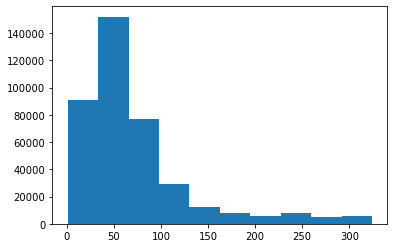

In [11]:
plt.hist(emp_df['title'].str.len())

In [49]:
emp_df.drop('is_blank', axis = 1, inplace = True)

In [12]:
# How many observations have missing 'selftext' AND a 'title' == NA?
len(emp_df[emp_df['selftext'].isna() & emp_df['title'].isna()])

0

In [13]:
# How many observations have 'selftext' removed
len(emp_df[emp_df['selftext'] == '[removed]'])

14128

In [87]:
# How many observations have 'selftext' deleted
len(emp_df[emp_df['selftext'] == '[deleted]'])

9

In [23]:
# What's the distribution of the length of the title in the above cases.
# plt.hist(emp_df['title'][emp_df['selftext'] == '[removed]'].str.len())

sum(emp_df['title'][emp_df['selftext'] == '[removed]'].str.len() < 50)

5863

In [26]:
# What's the distribution of the length of the title in the above cases.
# plt.hist(emp_df['title'][emp_df['selftext'] == '[removed]'].str.len())
sum(emp_df['title'][emp_df['selftext'] == '[deleted]'].str.len() < 50)

4

In [58]:
emp_df['is_reddit_media_domain'].value_counts()

False    387249
True       6682
Name: is_reddit_media_domain, dtype: int64

In [70]:
# How many observations have non missing 'selftext' if marked as 'is_reddit_media_domain'?
emp_df['selftext'][emp_df['selftext'].notna() & emp_df['is_reddit_media_domain'] == True]

Series([], Name: selftext, dtype: object)

In [71]:
# How many observations have non missing 'titles' if marked as 'is_reddit_media_domain'?
len(emp_df['title'][emp_df['title'].notna() & emp_df['is_reddit_media_domain'] == True])

6682

In [78]:
emp_df.is_robot_indexable.value_counts()

True     360464
False     33467
Name: is_robot_indexable, dtype: int64

In [31]:
emp_df['selftext'][emp_df['is_robot_indexable'] == False].unique()

array([nan, '[removed]',
       '[removed]\n\n[View Poll](https://www.reddit.com/poll/jlsbj1)',
       '[removed]\n\n[View Poll](https://www.reddit.com/poll/jkg2vg)',
       '[removed]\n\n[View Poll](https://www.reddit.com/poll/jit8os)',
       '[removed]\n\n[View Poll](https://www.reddit.com/poll/jxcnbe)',
       '[removed]\n\n[View Poll](https://www.reddit.com/poll/jwa9ny)',
       '[removed]\n\n[View Poll](https://www.reddit.com/poll/k1m2qr)',
       '[removed]\n\n[View Poll](https://www.reddit.com/poll/k1m2qd)',
       '[removed]\n\n[View Poll](https://www.reddit.com/poll/k9mdch)',
       '[removed]\n\n[View Poll](https://www.reddit.com/poll/ke4bb3)',
       '[removed]\n\n[View Poll](https://www.reddit.com/poll/kdd8c9)',
       '[removed]\n\n[View Poll](https://www.reddit.com/poll/kl92lt)',
       '[removed]\n\n[View Poll](https://www.reddit.com/poll/kl7ajj)',
       '[removed]\n\n[View Poll](https://www.reddit.com/poll/kt7njm)',
       '[removed]\n\n[View Poll](https://www.reddit.

In [40]:
use_bins = np.arange(0, 25000, 10)

In [41]:
len(use_bins)

2500

In [125]:
len(emp_df[emp_df['num_comments'] == 0])

130677

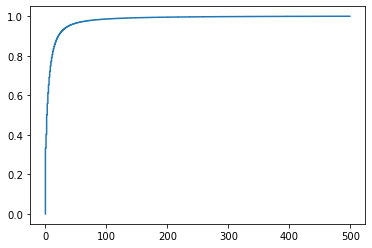

In [141]:
# plt.plot(np.sort(emp_df['num_comments']), np.linspace(0, 1, len(emp_df['num_comments']), endpoint=False))
def plot_ecdf(df, col, limit):

    data = np.sort(df[col])[:393348]

    plt.plot(data, 
             np.linspace(0, 1, len(data), 
                         endpoint=False))
    
plot_ecdf(emp_df, 'num_comments')

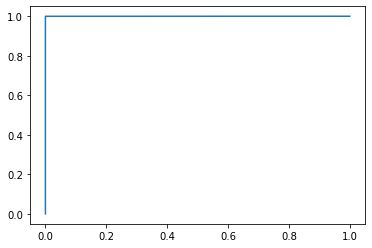

In [142]:
plot_ecdf(emp_df, 'num_crossposts')

In [150]:
lim = 0
col = 'num_crossposts'

emp_df[col][emp_df[col] <= lim].count()/len(emp_df)

0.9982991945289911

In [151]:
emp_df[col][emp_df[col] == 0].count()/len(emp_df)

0.9982991945289911